In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/home/zam21003/hindi_tweets_translation.csv')

In [4]:
df.columns = df.iloc[0]
df = df.drop(0)

In [5]:
df

,tweet,Human translation,Google translation,Chatgpt translation,NaN,NaN,NaN
1,'कांग्रेस पार्टी से संघी मुसंघी वाइरस की सफाई ...,Clean the congress party from the sanghi musan...,Cleanse the Sanghi Musanghi virus from the Con...,"""Clean the Congress party from the Sangh's vir...",NaN,NaN,NaN
2,@SureshRajvans10 @WickyBhim दुष्ट ब्राह्मण हैं...,"Suresh, wicky is an evil brahman. Disgraceful ...",@SureshRajvans10 @WickyBhim are evil Brahmins....,"""@SureshRajvans10 @WickyBhim are evil Brahmins...",NaN,NaN,NaN
3,@HiGuptaVishal @kaajukatla @ArvindKejriwal घी ...,Ghee is measured in liters. Virus of cabbage s...,@HiGuptaVishal @kaajukatla @ArvindKejriwal Ghe...,"""@HiGuptaVishal @kaajukatla @ArvindKejriwal Gh...",NaN,NaN,NaN
4,'यह एक वाइरस रुपी अर्ध संस्कारी बिमारी है यह ब...,"This is a form of semi-cultured disease, the s...",This is a semi-cultured disease in the form of...,"""This is a virus-like semi-civilized disease. ...",NaN,NaN,NaN
5,वाइरस है ये बॉलीवडियन\n#YashChopra',This bollywoodian is a virus #yash Chopra,This Bollywoodian is a virus\n#YashChopra'\n,"""This is a virus Bollywoodian. #YashChopra""",NaN,NaN,NaN
6,@Chaik0_00 ये नया zometo वाइरस है ।',This new tometo is a virus,@Chaik0_00 This is the new zometo virus.\n,"""@Chaik0_00 This is a new Zomato virus.""",NaN,NaN,NaN
7,'नड्डा जी कर्नाटक के लोगों को धमका रहे हैं। \n...,Nadda ji is threatening the people of Karnatak...,'Nadda ji is threatening the people of Karnata...,"""Nadda Ji is threatening the people of Karnata...",NaN,NaN,NaN
8,@nitinagarwalINC @RahulGandhi ये तो होना ही था...,This was bound to happen. Yesterday’s lawyers ...,@nitinagarwalINC @RahulGandhi This was bound t...,"""@nitinagarwalINC @RahulGandhi This was bound ...",NaN,NaN,NaN
9,'@AishMohammadKh5 @zoo_bear @bastar_police @Ba...,"Your community is a virus, now hindus are catc...",'@AishMohammadKh5 @zoo_bear @bastar_police @Ba...,"""@AishMohammadKh5 @zoo_bear @bastar_police @Ba...",NaN,NaN,NaN
10,#अरुंधति_राॅय ने एक विदेशी चैनल #DW को इंटरव्य...,Arundhati roy while giving an interview to a f...,"#Arundhati_Roy, while giving an interview to a...","""#Arundhati_Roy, while giving an interview to ...",NaN,NaN,NaN


In [6]:
chatgpt_google = []

from sentence_transformers import SentenceTransformer, util
for i in range(1,len(df)):
    sentences = [df['Google translation'][i],df['Chatgpt translation'][i]]

    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

    #Compute embedding for both lists
    embedding_1= model.encode(sentences[0], convert_to_tensor=True)
    embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

    chatgpt_google.append(util.pytorch_cos_sim(embedding_1, embedding_2))
## tensor([[0.6003]])


/home/zam21003/Anaconda/envs/cross_lingual/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
/home/zam21003/Anaconda/envs/cross_lingual/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [7]:
human_chatgpt = []
from sentence_transformers import SentenceTransformer, util
for i in range(1,len(df)):
    sentences = [df['Human translation'][i],df['Chatgpt translation'][i]]

    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

    #Compute embedding for both lists
    embedding_1= model.encode(sentences[0], convert_to_tensor=True)
    embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

    human_chatgpt.append(util.pytorch_cos_sim(embedding_1, embedding_2))
## tensor([[0.6003]])


In [8]:
google_human = []
from sentence_transformers import SentenceTransformer, util
for i in range(1,len(df)):
    sentences = [df['Human translation'][i],df['Google translation'][i]]

    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

    #Compute embedding for both lists
    embedding_1= model.encode(sentences[0], convert_to_tensor=True)
    embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

    google_human.append(util.pytorch_cos_sim(embedding_1, embedding_2))
## tensor([[0.6003]])

In [20]:
human_chatgpt[0]

tensor([[0.9238]], device='cuda:0')

In [23]:
chatgpt_google

[tensor([[0.8750]], device='cuda:0'),
 tensor([[0.5348]], device='cuda:0'),
 tensor([[0.9342]], device='cuda:0'),
 tensor([[0.8365]], device='cuda:0'),
 tensor([[0.9357]], device='cuda:0'),
 tensor([[0.8086]], device='cuda:0'),
 tensor([[0.9527]], device='cuda:0'),
 tensor([[0.9235]], device='cuda:0'),
 tensor([[0.9375]], device='cuda:0')]

In [24]:
google_human

[tensor([[0.9058]], device='cuda:0'),
 tensor([[0.2840]], device='cuda:0'),
 tensor([[0.8990]], device='cuda:0'),
 tensor([[0.9307]], device='cuda:0'),
 tensor([[0.8805]], device='cuda:0'),
 tensor([[0.5846]], device='cuda:0'),
 tensor([[0.8302]], device='cuda:0'),
 tensor([[0.8407]], device='cuda:0'),
 tensor([[0.8104]], device='cuda:0')]

In [1]:
human_chatgpt[0]

NameError: name 'human_chatgpt' is not defined

In [23]:
tensor_value = human_chatgpt[0].cpu().numpy()

In [26]:
tensor_value[0][0]

0.9238372

In [38]:
def tensor_numerical(a_list):
    new_list = []
    for i in a_list:
        new_value = i.cpu().numpy()[0][0]
        
        new_list.append(new_value)
    return new_list

In [39]:
human_chat_gpt_list = tensor_numerical(human_chatgpt)
google_human_list = tensor_numerical(google_human)
chatgpt_google_list = tensor_numerical(chatgpt_google)

[0.9238372,
 0.4887395,
 0.857069,
 0.8762374,
 0.82664776,
 0.51067066,
 0.8621089,
 0.915631,
 0.8180839]

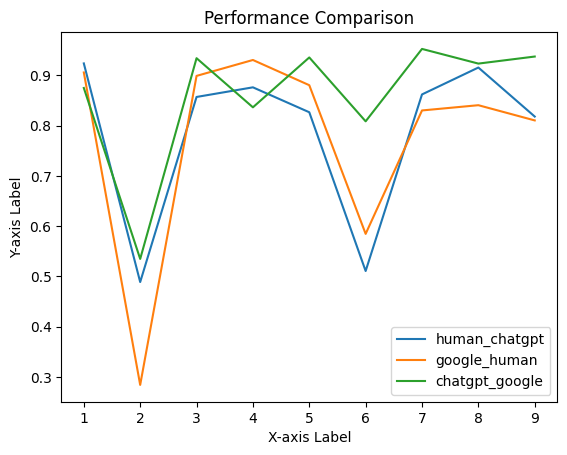

In [41]:
import matplotlib.pyplot as plt



# X-axis values (e.g., time points)
x_values = [1, 2, 3, 4, 5,6,7,8,9]

# Plotting each list as a separate line
plt.plot(x_values, human_chat_gpt_list, label='human_chatgpt')
plt.plot(x_values, google_human_list, label='google_human')
plt.plot(x_values, chatgpt_google_list, label='chatgpt_google')

# Adding labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Performance Comparison')
plt.legend()